# Exploration and Profiling

- **Created by Andrés Segura Tinoco**
- **Created on Oct 4, 2019**

In [1]:
# Load the Pandas libraries
import pandas as pd
import pandas_profiling as pp
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
# Load warnings library
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read raw data
dataURL = "../data/dataset-single.csv"
rawdata = pd.read_csv(dataURL)

If you want to see the complete dataset, please click <a href="https://github.com/ansegura7/Keras_RegressionNN/blob/master/data/dataset-single.csv" target="_blank">here</a>.

## Data Exploration

In [4]:
# Dataframe rows and columns
rawdata.shape

(2254, 16)

In [5]:
# Preview the first 10 lines of the loaded data
rawdata.head(10)

,WellID,Date,MethodID,CHP,THP,Temp,Choke,Qinj,PVT_fvFO,PVT_Zed,PVT_SpgO,PVT_SpgGP,Rel_Oper_Press,Rel_Crit_Press,WC,Test_Oil
0,84,7/23/2012,9008,21.50909,15.90000,96.87778,1.725,0.0,1.114856,0.972937,0.92303,0.799,0.751178,0.530322,0.366667,10945.72
1,84,7/24/2012,9008,21.53333,15.94167,97.46500,1.725,0.0,1.115611,0.973062,0.92303,0.799,0.752218,0.530345,0.323958,NaN
2,84,7/25/2012,9008,21.53846,15.98077,97.93182,1.725,0.0,1.116182,0.973176,0.92303,0.799,0.753779,0.530387,0.281250,NaN
3,84,7/26/2012,9008,21.53572,16.01786,99.60455,1.725,0.0,1.118186,0.973606,0.92303,0.799,0.755514,0.530576,0.325000,NaN
4,84,7/27/2012,9008,21.54000,16.05000,100.27730,1.725,0.0,1.119005,0.973771,0.92303,0.799,0.756795,0.530641,0.335000,NaN
5,84,7/28/2012,9008,21.98333,16.33667,100.82270,1.725,0.0,1.120600,0.973417,0.92303,0.799,0.754672,0.529952,0.326429,NaN
6,84,7/29/2012,9008,21.99333,16.34667,101.28640,1.725,0.0,1.121179,0.973524,0.92303,0.799,0.754779,0.529985,0.317857,NaN
7,84,7/30/2012,9008,21.97000,16.32000,101.68640,1.725,0.0,1.121612,0.973650,0.92303,0.799,0.754385,0.530068,0.309286,NaN
8,84,7/31/2012,9008,21.95667,16.32667,102.11360,1.725,0.0,1.122100,0.973772,0.92303,0.799,0.755113,0.530137,0.300714,NaN
9,84,8/1/2012,9008,21.93633,16.37427,102.38640,1.725,0.0,1.122386,0.973863,0.92303,0.799,0.757854,0.530200,0.292143,NaN


In [6]:
# Show default data types
rawdata.dtypes

WellID              int64
Date               object
MethodID            int64
CHP               float64
THP               float64
Temp              float64
Choke             float64
Qinj              float64
PVT_fvFO          float64
PVT_Zed           float64
PVT_SpgO          float64
PVT_SpgGP         float64
Rel_Oper_Press    float64
Rel_Crit_Press    float64
WC                float64
Test_Oil          float64
dtype: object

In [7]:
# Describe dataframe: main stats
rawdata.describe()

,WellID,MethodID,CHP,THP,Temp,Choke,Qinj,PVT_fvFO,PVT_Zed,PVT_SpgO,PVT_SpgGP,Rel_Oper_Press,Rel_Crit_Press,WC,Test_Oil
count,2254.0,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2.254000e+03,2.254000e+03,2254.000000,2254.000000,2254.000000,68.000000
mean,84.0,9005.212955,17.028922,13.412939,91.138407,2.519848,2.961972,1.099543,0.975990,9.230300e-01,7.990000e-01,0.836281,0.550491,53.790977,3422.173235
std,0.0,0.770570,4.231508,1.491612,13.282599,2.079294,1.447352,0.013309,0.007963,2.909430e-14,1.798960e-14,0.171091,0.007908,27.526137,4070.715391
min,84.0,9005.000000,9.552428,8.857142,0.000000,0.725000,0.000000,1.010123,0.907691,9.230300e-01,7.990000e-01,0.360616,0.524200,0.025000,196.480000
25%,84.0,9005.000000,14.187188,12.333330,81.850000,0.725000,2.000000,1.092249,0.973931,9.230300e-01,7.990000e-01,0.772128,0.544596,42.666670,1291.120000
50%,84.0,9005.000000,15.285430,13.400000,94.305000,1.725000,4.000000,1.100507,0.978849,9.230300e-01,7.990000e-01,0.916900,0.551657,63.200000,1747.268500
75%,84.0,9005.000000,18.396427,14.316670,102.643525,4.000000,4.000000,1.109240,0.981207,9.230300e-01,7.990000e-01,0.957596,0.557787,70.666660,2925.970250
max,84.0,9008.000000,37.050000,17.850000,108.440900,7.000000,4.750000,1.123951,0.985178,9.230300e-01,7.990000e-01,1.086741,0.559697,97.000000,15459.160000


## Descriptives statistics

In [8]:
# Get only numerical variables
num_cols = ["CHP", "THP", "Temp", "Choke", "Qinj", "PVT_fvFO", "PVT_Zed", "PVT_SpgO", "PVT_SpgGP", "Rel_Oper_Press", "Rel_Crit_Press", "WC", "Test_Oil"]
num_cols

['CHP',
 'THP',
 'Temp',
 'Choke',
 'Qinj',
 'PVT_fvFO',
 'PVT_Zed',
 'PVT_SpgO',
 'PVT_SpgGP',
 'Rel_Oper_Press',
 'Rel_Crit_Press',
 'WC',
 'Test_Oil']

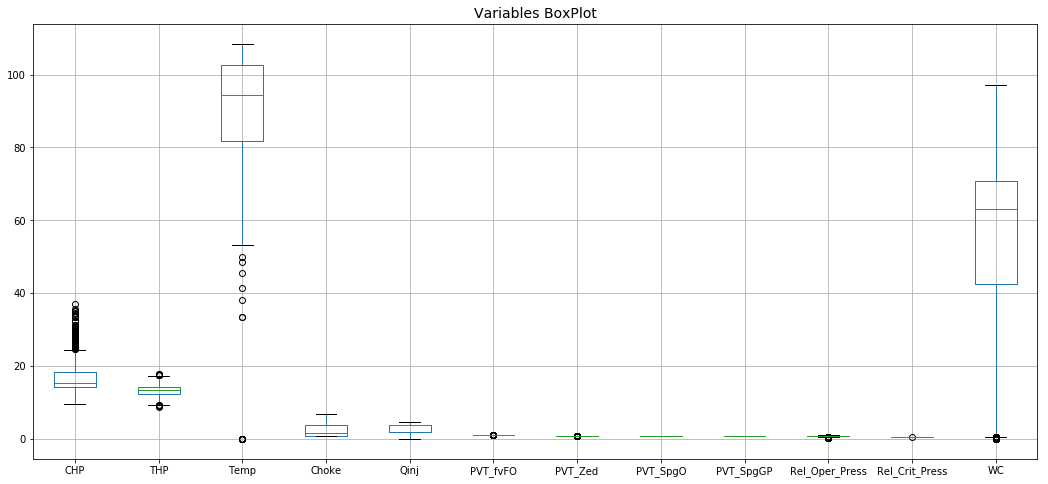

In [9]:
# Boxplot
fig = plt.figure(figsize = (18, 8))
rawdata[num_cols[:-1]].boxplot()
plt.title('Variables BoxPlot', fontsize = 14)
plt.show()

<Figure size 432x288 with 0 Axes>

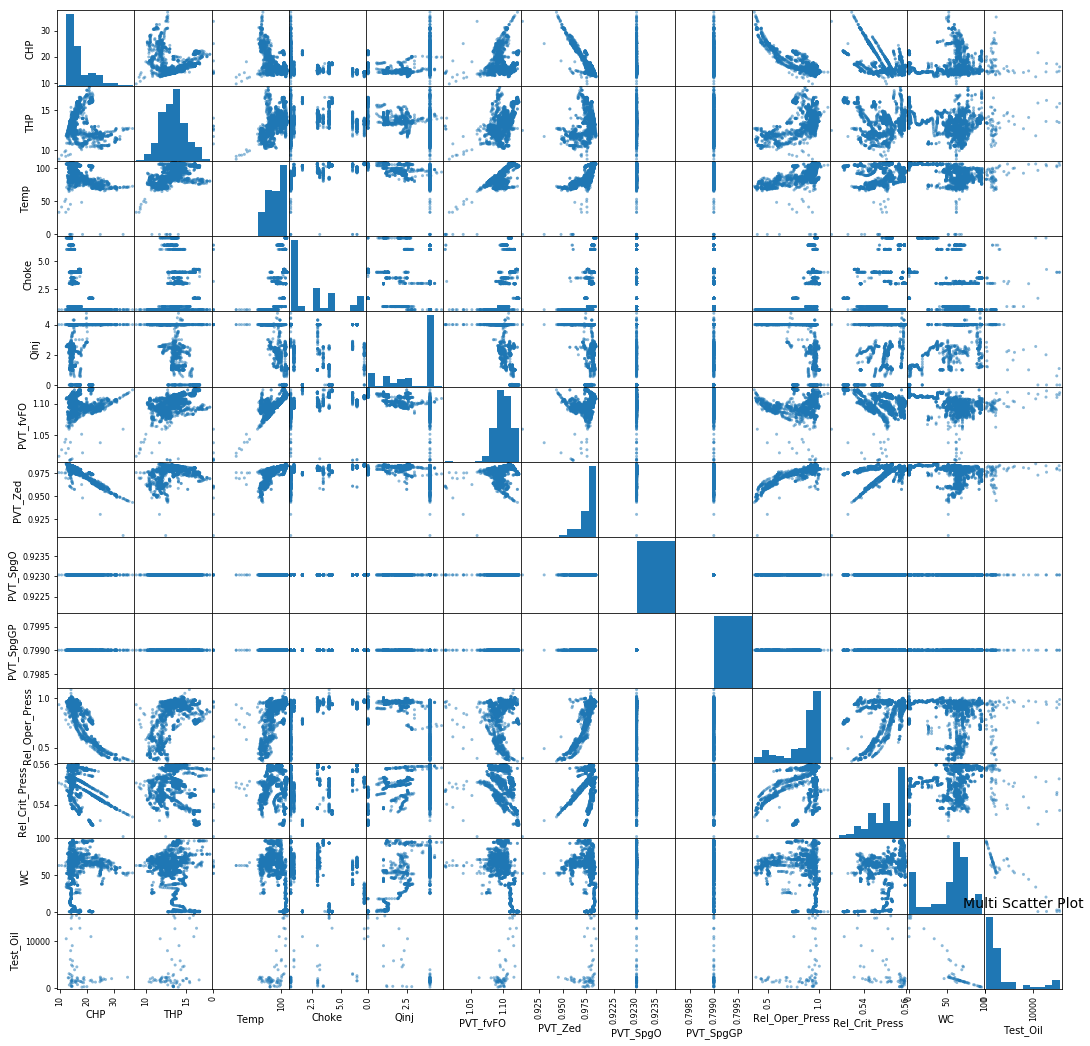

In [10]:
# Compare and plot the variables
plt.figure()
scatter_matrix(rawdata[num_cols], alpha=0.5, figsize=(18, 18))
plt.title('Multi Scatter Plot', fontsize = 14)
plt.show()

## Data Profiling

In [11]:
# Showing data profiling
pp.ProfileReport(rawdata)

Number of variables,16
Number of observations,2254
Total Missing (%),6.1%
Total size in memory,281.8 KiB
Average record size in memory,128.0 B
Numeric,11
Categorical,0
Boolean,1
Date,0
Text (Unique),1
Rejected,3


## Conclusion
Variables **WellID**, **PVT_SpgO** and **PVT_SpgGP** will not be used as input of the model, because their values are constant and do not provide relevant information.

<hr>
<p><a href="https://ansegura7.github.io/Keras_RegressionNN/">« Home</a></p>